In [8]:
library(GLMsData)
library(statmod)
data(blocks)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [3]:
str(blocks)

'data.frame':	100 obs. of  6 variables:
 $ Child : Factor w/ 25 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Number: int  11 9 8 9 10 13 10 7 6 12 ...
 $ Time  : num  30 19 18.6 23 29 178 42 20.2 12 39.2 ...
 $ Trial : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Shape : Factor w/ 2 levels "Cube","Cylinder": 1 1 1 1 1 1 1 1 1 1 ...
 $ Age   : num  4.67 5 4.42 4.33 4.33 4.83 4.42 5 3.58 4 ...


In [11]:
blocks

Child,Number,Time,Trial,Shape,Age
A,11,30.0,1,Cube,4.67
B,9,19.0,1,Cube,5.00
C,8,18.6,1,Cube,4.42
D,9,23.0,1,Cube,4.33
E,10,29.0,1,Cube,4.33
F,13,178.0,1,Cube,4.83
G,10,42.0,1,Cube,4.42
H,7,20.2,1,Cube,5.00
I,6,12.0,1,Cube,3.58
J,12,39.2,1,Cube,4.00


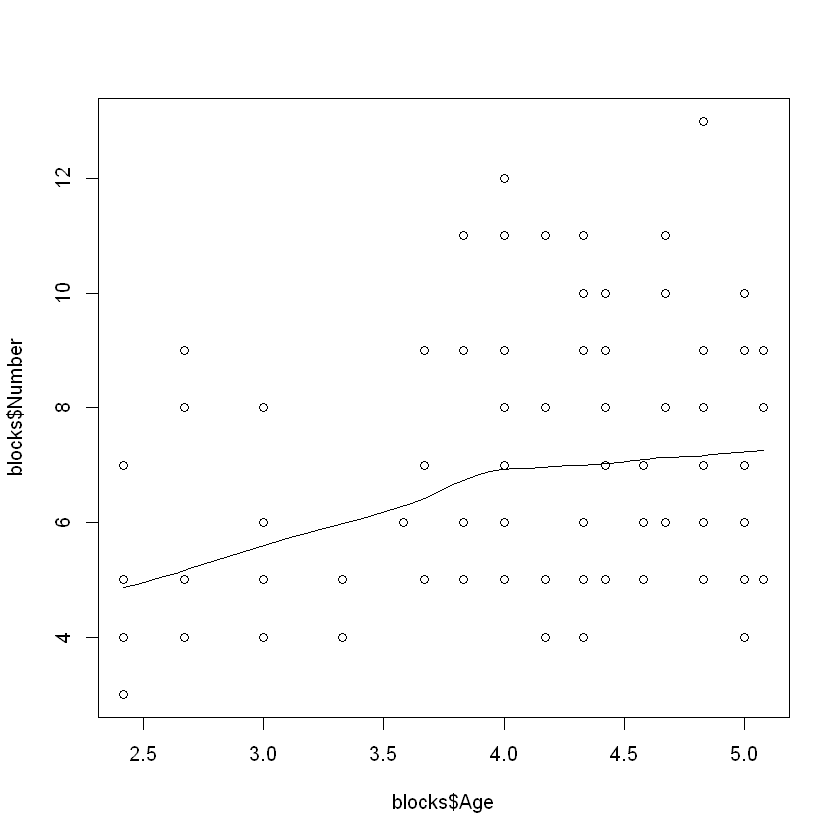

In [4]:
scatter.smooth(blocks$Number ~ blocks$Age)

In [6]:
glm.1 <- glm(Number ~ Age, family = poisson(link="log"), data=blocks)

In [7]:
coef(summary(glm.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),1.3446992,0.22235364,6.047570,1.470468e-09
Age,0.1415096,0.05340039,2.649974,8.049803e-03


In [9]:
glm.scoretest(glm.1, blocks$Age)

[1] -0.1867435

In [10]:
summary(glm.1)$dispersion

[1] 1

In [12]:
deviance(glm.1)/df.residual(glm.1)

[1] 0.6351412

In [13]:
qchisq(0.95, df=df.residual(glm.1))

[1] 122.1077

In [14]:
glm.0 <- glm(Number ~ 1, family = poisson(link="log"), data=blocks)

In [16]:
L = deviance(glm.0) - deviance(glm.1)
L

[1] 7.185388

In [17]:
pchisq(L, df=1, lower.tail = FALSE)

[1] 0.007349966

In [23]:
z.stat <- glm.scoretest(glm.0, blocks$Age)
p.val <- 2 * pnorm( abs(z.stat), lower.tail=FALSE)
p.val

[1] 0.007994986

In [24]:
confint(glm.1)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),0.9024058,1.7742235
Age,0.0377308,0.2471074


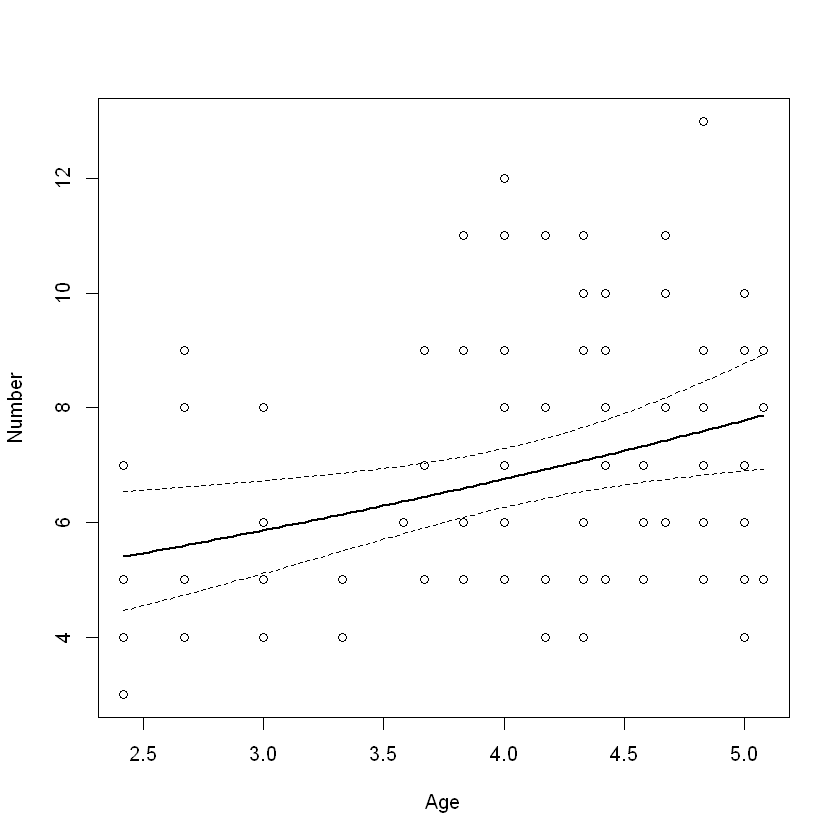

In [30]:
newAge = seq(min(blocks$Age), max(blocks$Age), length=100)
newNum = predict(glm.1, newdata=data.frame(Age=newAge), se.fit=TRUE)
z.star <- qnorm(0.025, lower.tail = FALSE)
ci.lo <- exp(newNum$fit - z.star*newNum$se.fit)
ci.hi <- exp(newNum$fit + z.star*newNum$se.fit)

plot(Number ~ Age, data=blocks)
lines(exp(newNum$fit) ~ newAge, lwd=2)
lines(ci.lo ~ newAge, lty=2)
lines(ci.hi ~ newAge, lty=2)